#      Project: Medical Appointment No Shows Analysis

# 

#### Project: Medical Appointment No Shows Analysis
    Table of Contents
    Introduction
    Data Wrangling
    Exploratory Data Analysis
    Conclusions

In [3]:
#pwd

##### About Data -

This is an analysis of the No-show appointments datasets. The data contains 110,527 medical appointments record with its 14 associated variables (characteristics). The most important one is if a patient show-up or does not show up to the appointment. The analysis was made to find if a choosing set of variables might likely be a predictor of whether a patient shows up for their appointment or not.

##### Variable Description 
The dataset contains a total of 14 variables. However as the analysis progressed the number of variables were trimmed down. The variables that remained were those that the analyst thought might be of importance to the analysis. The total variables of the dataset by default are as follows:

1.  PatientId
2.  AppointmentID
3.  Gender
4.  ScheduledDay
5.  AppointmentDay
6.  Age
7.  Neighbourhood
8.  Scholarship
9.  Hipertension
10. Diabetes
11. Alcoholism
12. Handcap
13. SMS_received
14. No-show

###### While the trimmed down dataset includes the following columns

Introduction
About
This is an analysis of the No-show appointments datasets. The data contains 110,527 medical appointments record with its 14 associated variables (characteristics). The most important one is if a patient show-up or does not show up to the appointment. The analysis was made to find if a choosing set of variables might likely be a predictor of wether a patient shows up for their appointment or not.

Variable Description
The dataset contains a total of 14 variables. However as the analysis progressed the number of variables were trimmed down. The variables that remained were those that the analyst thought might be of importance to the analysis. The total variables of the dataset by default are as follows:

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show
While the trimmed down dataset includes the following columns

1. Gender > The gender of the patient
2. Scheduled day > The day the appointment was setup
3. Appointment day > The main appointment day
4. Age > Age of the patient
5. Neighbourhood > Location of the hospital
6. Scholarship > Whether or not a patient is a welfare        recipient
7. Hypertension > Hypertensive status of the patient
8. Diabetes > Diabetic status of the patient
9. Alcoholism > Whether the patient is an alcoholic
10. Handcap > whether the patient is an Handicap
10. Sms received > Whether an SMS reminder was sent
11. show > Whether the patient showed up for the   appointment

#### Analysis question

######  What factors are important to keep in mind in order        to predict if a patient will show up for their            scheduled appointment ?

In [4]:
#Library we need to import is - 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


In [6]:
#df = pd.read_csv('C:\\Users\\medical_appoinment_no_show.csv')

#### Let's understand the data

This section includes the steps taken to understand the dataset. Also included as part of the session was the data cleaning stage. The cleaning was done to ensure data consistency, correct data formatting, handling duplicates and adjusting columns names for convenience of the analysis

In [7]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [8]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#dimension of data(rows,columns)
df.shape

(110527, 14)

In [11]:
# statistical description of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#variables (column) names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### Check for missing values

In [13]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

from the above observation it could be observed that
the orginial dataset has no missing values.

### Data Cleaning - 

##### Adjust column names - convert to lowercase to ensure consistency and typing convenience

In [14]:
df.columns = pd.Series(df.columns).apply(lambda x:x.lower().replace('-','_').replace('day','_day'))

###### Adjusting spellings and confusing column name

###### The 'no_show' column was confusing, so it was renamed show.

In [15]:
#Adjust spelling of 'hypertension'
df.rename(columns={'hipertension':'hypertension','no_show':'show'},inplace=True)

In [16]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'show'],
      dtype='object')

##### Remove non useful columns -

Columns patientid and appointmentid were removed because they were dimmed to be of no relevance to the analysis. This decision was predicated on the fact that the anlaysis does no go into individuals but rather the population as a whole.

In [17]:
df.drop(['patientid','appointmentid'],axis=1,inplace=True)

df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'show'],
      dtype='object')

##### Feature engineering

This section contain adjustment to the dataset variable
elements for easy manipulation

In [18]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Below is the adjustments to the show column values made to reflect the change of name of the column.

In [19]:
# switch 'show' column values to reflect the change of
# name from no_show to show

df.show = df.show.apply(lambda x:'Yes' if x =='No' else 'No')

df.sample(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
81219,F,2016-05-16T10:41:36Z,2016-05-18T00:00:00Z,19,BONFIM,0,0,0,0,0,0,No
12920,F,2016-04-05T11:46:26Z,2016-05-31T00:00:00Z,27,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
3284,F,2016-05-12T10:26:44Z,2016-05-24T00:00:00Z,29,MARIA ORTIZ,0,0,0,0,0,1,No
8929,F,2016-05-03T11:40:26Z,2016-05-10T00:00:00Z,32,BELA VISTA,0,0,0,0,0,1,Yes
103849,F,2016-05-13T07:10:11Z,2016-06-08T00:00:00Z,51,SANTO ANDRÉ,0,0,0,0,0,1,Yes


In [20]:
df.iloc[:,[5,6,7,8,10]].nunique()

scholarship     2
hypertension    2
diabetes        2
alcoholism      2
sms_received    2
dtype: int64

In [21]:
df['show']=df['show'].apply(lambda x:'Yes' if x =='Yes' else 'No')

In [22]:
df.sample(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
31564,F,2016-05-18T12:06:56Z,2016-05-19T00:00:00Z,51,PRAIA DO CANTO,0,0,0,0,0,0,Yes
63460,F,2016-05-10T08:28:15Z,2016-05-10T00:00:00Z,23,SÃO BENEDITO,0,0,0,0,0,0,Yes


In [23]:
df.iloc[:,[5,6,7,8,9,10]].nunique()

scholarship     2
hypertension    2
diabetes        2
alcoholism      2
handcap         5
sms_received    2
dtype: int64

# 

#####  Value observation

  The unique values above was observed to be boolean by intention. Therefor the process below changes 1s and 0s to be 'Yes' and 'No

In [24]:
def change_01_to_str_eq(x):
    return 'Yes' if x==1 else 'No'

target_columns = df.iloc[:,[5,6,7,8,10]].columns
for column in target_columns:
    df[column] = df[column].apply(change_01_to_str_eq)

In [25]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,0,No,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Yes


In [26]:
df.dtypes

gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship        object
hypertension       object
diabetes           object
alcoholism         object
handcap             int64
sms_received       object
show               object
dtype: object

# 

### Exploratory Data Analysis

The section below contains the exploratory analysis of the dataset. The steps are categorized based on particular question they are answering. Each question contains some data manipulation and plots that is intended to fairly answer the question.

###### Can age be an indicator of whether a patient shows up for a medical appointment? 

##### 

In [27]:
df.describe()

,age,handcap
count,110527.000000,110527.000000
mean,37.088874,0.022248
std,23.110205,0.161543
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


In [28]:
# remove abnormal age
age_df = df.drop(df[df.age<=-1].index,axis=0)
age_df[age_df.age<=-1]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show


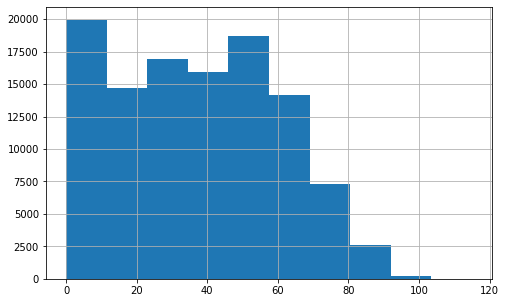

In [31]:
age_df['age'].hist(figsize=(8,5),bins=10);

In [31]:
age_df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

##### Grouping Age range

To simplify analysis on age, the age variable is classified in a new column named 'age_label'

In [32]:
def group_age(x):
    if x<=14:
        return 'child'
    if x>14 and x<=24:
        return 'youth'
    if x > 24 and x <= 64:
        return 'adult'
    if x>64:
        return 'senior'

age_df['age_label'] = age_df['age'].apply(group_age)
age_df.sample(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,age_label
67891,F,2016-05-16T13:54:37Z,2016-05-20T00:00:00Z,11,JARDIM CAMBURI,No,No,No,No,0,No,Yes,child
58111,M,2016-05-09T16:30:06Z,2016-05-12T00:00:00Z,36,JARDIM DA PENHA,No,No,No,No,0,No,Yes,adult


# 

##### Percentage of 'showing up' by the different age groups

Below is the total observations of each age group

In [41]:
#totals in age groups

labels = age_df['age_label'].unique()
group_totals = {label: age_df[age_df['age_label']==
label]['age'].size for label in labels}     
group_totals

{'adult': 58857, 'child': 23257, 'senior': 14402, 'youth': 14010}

In [44]:
## Group dataset of the age groups
age_group_df = age_df.groupby(['show', 'age_label'],as_index=False)['age'].count()

# rename the column
age_group_df.rename(columns = {'age':'ind_count'},inplace=True)

#calcultae proportion in terms of percentage 
def calc_prop(x):
    return round((x['ind_count']/group_totals[x['age_label']])*100,2) #....Doubt

age_group_df['%_of_total'] = age_group_df.apply(calc_prop,axis=1)


#Filter df to patient that 'show'
age_group_show_df = age_group_df[age_group_df['show'] == 'Yes']

In [45]:
age_group_df

,show,age_label,ind_count,%_of_total
0,No,adult,11620,19.74
1,No,child,4926,21.18
2,No,senior,2233,15.50
3,No,youth,3540,25.27
4,Yes,adult,47237,80.26
5,Yes,child,18331,78.82
6,Yes,senior,12169,84.50
7,Yes,youth,10470,74.73


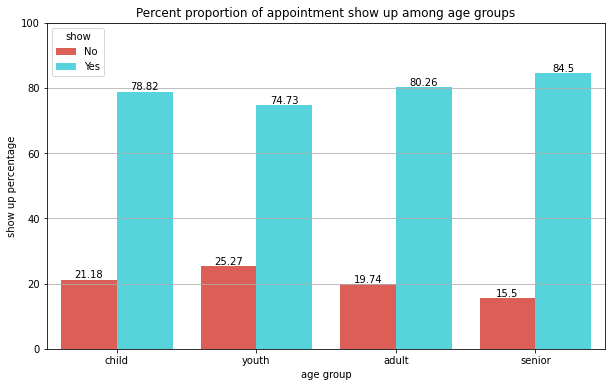

In [46]:
plt.figure(figsize = (10,6))
plt.ylim(0,100)

ax = sns.barplot(x = 'age_label',y = '%_of_total',hue='show',
        data = age_group_df,palette='hls',
                 order = ['child','youth','adult','senior'],
                 capsize = 0.05, saturation = 8)
plt.xlabel('age group')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show up among age groups')
plt.grid(axis = 'y')

for i in ax.containers:
          ax.bar_label(i)

plt.show()

# 

##### can the gender of a patient be a determinant of the likelihood of a pateint showing up for a medical appointment

###### These question explores the likelihood of the impact of gender as a predictor of a patient showing up for appointment.

In [43]:
#Gender Totals

total_male = df[df['gender']=='M']['gender'].size
total_female = df[df['gender']=='F']['gender'].size

gender_grouped_df = df.groupby(['gender','show'],as_index
    = False).count().iloc[:,:3]

gender_grouped_df.rename(columns={'scheduled_day':'count'},
                        inplace = True)

gender_grouped_df

,gender,show,count
0,F,No,14594
1,F,Yes,57246
2,M,No,7725
3,M,Yes,30962


In [44]:
gender_grouped_df['%_of_total'] = gender_grouped_df.apply(
lambda x: round((x['count']/total_female)* 100,2)
if x['gender']=='F' else round ((x['count']/total_male)*
                               100,2),axis=1)

#make gender label more intuitive
gender_grouped_df['gender'] = gender_grouped_df['gender'].apply(lambda x: 'Female' if x == 'F' else 'Male')
gender_grouped_df

,gender,show,count,%_of_total
0,Female,No,14594,20.31
1,Female,Yes,57246,79.69
2,Male,No,7725,19.97
3,Male,Yes,30962,80.03


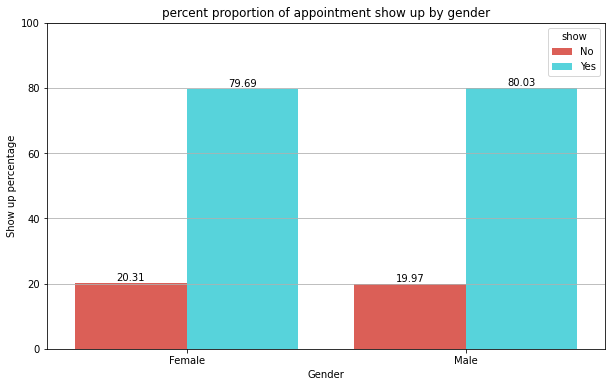

In [45]:
#plot

plt.figure(figsize=(10,6))
plt.ylim(0,100)

ax = sns.barplot(x = 'gender',y = '%_of_total',hue = 'show'
,data = gender_grouped_df, palette ='hls',capsize=0.05,
                saturation =8)

plt.xlabel('Gender')
plt.ylabel('Show up percentage')
plt.title('percent proportion of appointment show up by gender')
plt.grid(axis = 'y')

for i in ax.containers:
          ax.bar_label(i,)
plt.show()

# 

##### Does the appointment day of the week determine if a pateint will show up ?

These question seeks to explore the likely impact of the 
day of the week of the appointment on the likelihood of the
pateint showing up. To acheive this, another column containing
day of the week value was added

In [47]:
# Add weekday column

In [48]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes


In [49]:
def convert_day_name(d):
    '''
    This function converts a date type string to a day of week
       return str --> eg 'Friday'
    '''
    new_date = pd.Timestamp(d)
    return new_date.day_name()

convert_day_name('2016-04-29T18:38:08Z')

'Friday'

In [50]:
# Create day of the week column
df['ap_day_of_week'] = df.appointment_day.apply(convert_day_name)

df.sample(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,ap_day_of_week
62615,M,2016-05-31T17:50:15Z,2016-05-31T00:00:00Z,62,JARDIM CAMBURI,No,No,No,No,0,No,Yes,Tuesday
74965,M,2016-05-04T08:03:04Z,2016-05-16T00:00:00Z,39,ILHA DAS CAIEIRAS,No,No,No,No,0,No,No,Monday


In [51]:
#Group by appoinment day of the week

day_group_df = df.groupby(['ap_day_of_week','show'],
        as_index = False)['age'].count()

#filter to only appointments that show
# day_group_df = day_group_df[day_group_df.show=='Yes']

#rename 'age'
day_group_df.rename(columns = {'age':'show_count'},
                   inplace = True)

day_group_df

,ap_day_of_week,show,show_count
0,Friday,No,4037
1,Friday,Yes,14982
2,Monday,No,4690
3,Monday,Yes,18025
4,Saturday,No,9
5,Saturday,Yes,30
6,Thursday,No,3338
7,Thursday,Yes,13909
8,Tuesday,No,5152
9,Tuesday,Yes,20488


# 

Total rows for each of day of the week

In [52]:
day_totals = {day:df[df['ap_day_of_week']==day]['age'].size
        for day in day_group_df['ap_day_of_week']}

day_totals

{'Friday': 19019,
 'Monday': 22715,
 'Saturday': 39,
 'Thursday': 17247,
 'Tuesday': 25640,
 'Wednesday': 25867}

In [57]:
# calculation proportion function and add percentage column

def calc_prop(x):
    return  round((x['show_count']/day_totals[x.ap_day_of_week])*100,2)

day_group_df['%_of_totals'] = day_group_df.apply(calc_prop,
axis = 1)

day_group_df

,ap_day_of_week,show,show_count,%_of_totals
0,Friday,No,4037,21.23
1,Friday,Yes,14982,78.77
2,Monday,No,4690,20.65
3,Monday,Yes,18025,79.35
4,Saturday,No,9,23.08
5,Saturday,Yes,30,76.92
6,Thursday,No,3338,19.35
7,Thursday,Yes,13909,80.65
8,Tuesday,No,5152,20.09
9,Tuesday,Yes,20488,79.91


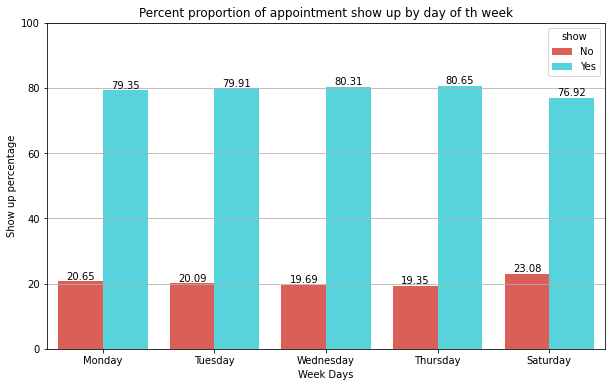

In [60]:
#plot for label and proportion
plt.figure(figsize=(10,6))
plt.ylim(0,100)

ax = sns.barplot(x='ap_day_of_week',y='%_of_totals',hue='show',
            data=day_group_df,palette='hls',capsize=0.05,
                order=['Monday','Tuesday','Wednesday','Thursday',
            'Saturday'],saturation=8)

plt.xlabel('Week Days')
plt.ylabel('Show up percentage')
plt.title('Percent proportion of appointment show up by day of th week')
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# 

##### Does SMS reminders influence showing up ?

##### The aim of this question is the exploration of the possible impact of sms reminder on the likelihood of a pateint showing up for appointment.

In [49]:
## Recieved sms and showed up grouped
sms_group_df = df.groupby(['sms_received','show'],
        as_index=False).age.count()
sms_group_df

,sms_received,show,age
0,No,No,12535
1,No,Yes,62510
2,Yes,No,9784
3,Yes,Yes,25698


In [63]:
#get totals

received_total = sms_group_df[sms_group_df.sms_received == 'Yes']['age'].sum()
no_received_total = sms_group_df[sms_group_df['sms_received']=='No']['age'].sum()

totals = {'Yes': received_total, 'No': no_received_total}                              

totals

{'Yes': 35482, 'No': 75045}

In [64]:
## add percent proportion column
sms_group_df['%_of_total'] = sms_group_df.apply(lambda x:
    round(x.age/totals[x.sms_received],2)*100,axis=1)

sms_group_df

,sms_received,show,age,%_of_total
0,No,No,12535,17.0
1,No,Yes,62510,83.0
2,Yes,No,9784,28.0
3,Yes,Yes,25698,72.0


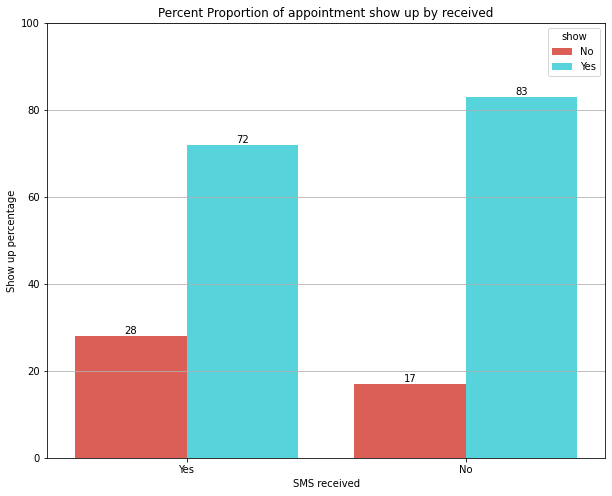

In [65]:
#plot

labels = ['Receive', 'Not received']

plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.grid(axis='y')

#plot
ax = sns.barplot(x = 'sms_received',y='%_of_total',hue='show',
    palette='hls',data= sms_group_df,order=['Yes','No'],
                capsize=0.05,saturation=8)

plt.xlabel('SMS received')
plt.ylabel('Show up percentage')
plt.title('Percent Proportion of appointment show up by received')

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

# 

##### Does the length of time between booking and actual apoointment time effect showing up?

This question seek to explore whether the time space 
between scheduling of appointment and the actual 
appointment time might likely have any effect on showing.

This is acheived by the addition of two more columns.
The contact_duration column was added to contain the 
integer representation of the duration representation of
the duration(days).While the duration_label was added to groupa 
and label the days.
This is done due to the large distributuion of duration
time

In [51]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes


In [52]:

df['contact_duration'] = pd.to_datetime(df
['appointment_day'])- pd.to_datetime(df['scheduled_day'])
    
df['contact_duration'] = df['contact_duration'].apply(
lambda x:x.days)
df['contact_duration'].describe()
# df['contact_duration']

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: contact_duration, dtype: float64

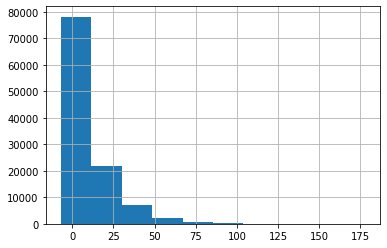

In [53]:
df['contact_duration'].hist();

In [54]:
df.contact_duration[df.contact_duration < 0].min()

-7

In [55]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,contact_duration
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes,-1


In [56]:
# explore negative duration

df.contact_duration[df.contact_duration < 0].count()

38568

In [57]:
# drop duration with negative values

df_filter_bad_duration = df.drop(df[df.contact_duration 
                                   < 0].index)

df_filter_bad_duration['contact_duration'].describe()

count    71959.000000
mean        14.642018
std         16.494334
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: contact_duration, dtype: float64

In [58]:
# group duration values

def group_duration(x):
    '''Labels the interval of int x'''
    if x <=1 :
        return '1 day'
    if x > 1 and x <= 7:
        return '1 week'
    if x > 7 and x <= 14:
        return '2 week'
    if x > 14 and x <= 21:
        return '3 week'
    if x > 21 and x <= 28:
        return '1 month'
    if x > 28 and x <= 56:
        return '2 months'
    if x > 56:
        return '3 months and above'
        

In [112]:
#Group and label duration

df_filter_bad_duration['duration_label'] =df_filter_bad_duration['contact_duration'].apply(group_duration)

df_filter_bad_duration.sample(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,ap_day_of_week,contact_duration,duration_label
34884,F,2016-05-05T09:03:01Z,2016-05-13T00:00:00Z,64,TABUAZEIRO,No,No,No,No,0,No,Yes,Friday,7,1 week
31348,F,2016-04-29T09:24:19Z,2016-05-06T00:00:00Z,33,DO MOSCOSO,No,No,No,No,0,No,No,Friday,6,1 week
11531,M,2016-05-11T09:12:28Z,2016-05-12T00:00:00Z,34,FRADINHOS,No,No,No,No,0,No,Yes,Thursday,0,1 day
65121,M,2016-04-07T19:55:31Z,2016-05-18T00:00:00Z,52,JARDIM CAMBURI,No,Yes,No,No,0,No,No,Wednesday,40,2 months
87832,F,2016-05-16T14:00:32Z,2016-06-07T00:00:00Z,24,CARATOÍRA,No,No,No,No,0,Yes,Yes,Tuesday,21,3 week


Totals of duration grouping

In [113]:
# duration_count_totals

duration_labels = df_filter_bad_duration.duration_label.value_counts().index
duration_count_totals = {label: df_filter_bad_duration[df_filter_bad_duration.duration_label == label].shape[0] for label in duration_labels}

duration_count_totals

{'1 week': 22579,
 '1 day': 11938,
 '2 week': 11196,
 '2 months': 8714,
 '3 week': 8544,
 '1 month': 6620,
 '3 months and above': 2368}

In [116]:
# duration and show up grouping

duration_group_df = df_filter_bad_duration.groupby([
    'duration_label', 'show'], 
    as_index = False)['contact_duration'].count()

#rename last column for clarity
duration_group_df.rename(columns = 
    {'contact_duration':'duration_count'},inplace = True)

duration_group_df

,duration_label,show,duration_count
0,1 day,No,2715
1,1 day,Yes,9223
2,1 month,No,2209
3,1 month,Yes,4411
4,1 week,No,5727
5,1 week,Yes,16852
6,2 months,No,2916
7,2 months,Yes,5798
8,2 week,No,3496
9,2 week,Yes,7700


In [117]:
# percentage calc functiom

def calc_prop(x):
    return round((x['duration_count']/duration_count_totals
                 [x.duration_label])*100,2)

In [118]:
# Add a percentage column

duration_group_df['%_of_total'] = duration_group_df.apply(calc_prop,axis =1)

duration_group_df

,duration_label,show,duration_count,%_of_total
0,1 day,No,2715,22.74
1,1 day,Yes,9223,77.26
2,1 month,No,2209,33.37
3,1 month,Yes,4411,66.63
4,1 week,No,5727,25.36
5,1 week,Yes,16852,74.64
6,2 months,No,2916,33.46
7,2 months,Yes,5798,66.54
8,2 week,No,3496,31.23
9,2 week,Yes,7700,68.77


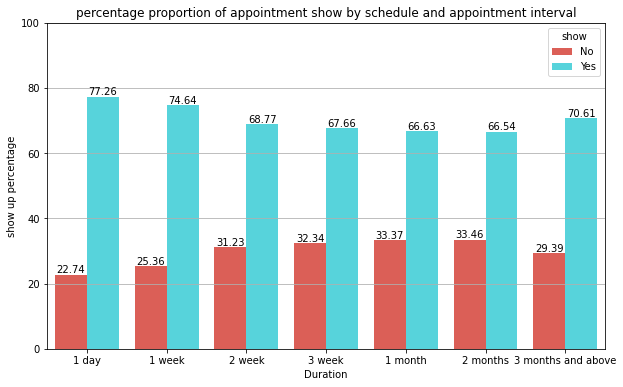

In [120]:
# plot

plt.figure(figsize=(10,6))
plt.ylim(0,100)

#bar_height_text(duration_group_df)
#plt.bar(duration_group_df['duration_label'],
#height = duration_group_df['%_of_total'],width=0.7,align='center')
#plt.show()
    
                           
ax =  sns.barplot(x='duration_label',y='%_of_total',hue='show',palette = 'hls',
                  data=duration_group_df,
        order = ['1 day','1 week','2 week', '3 week',
        '1 month','2 months','3 months and above'],capsize=0.05,
                saturation = 8)

plt.xlabel('Duration')
plt.ylabel('show up percentage')
plt.title('percentage proportion of appointment show by schedule and appointment interval')
plt.grid(axis='y')
                           
for i in ax.containers:
    ax.bar_label(i,)
plt.show()                           
                

# 

##### Does the type of ailment/disease determine showing up ?

This question explores the impact of variables hypertension,
diabetes,alcoholism on the likelihood of showing up for an
appointment.

In [122]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,ap_day_of_week,contact_duration
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes,Friday,-1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes,Friday,-1


In [128]:
#group base on ailments

hyp_group_df = df.groupby(['hypertension','show'],
                          as_index=False)['age'].count()
diab_group_df = df.groupby(['diabetes','show'],
            as_index=False)['age'].count()
alc_group_df = df.groupby(['alcoholism','show'],
            as_index=False)['age'].count()

#group individual elemnts based on showing up status
#hypertension pateints

hyp_show = hyp_group_df[(hyp_group_df.hypertension=='Yes')
    & (hyp_group_df.show=='Yes')].iloc[0,2]
hyp_no_show = hyp_group_df[(hyp_group_df.hypertension=='Yes')
    & (hyp_group_df.show=='No')].iloc[0,2]

#diabetic patients
diab_show = diab_group_df[(diab_group_df['diabetes']=='Yes')
    & (diab_group_df['show']=='Yes')].iloc[0,2]
diab_no_show = diab_group_df[(diab_group_df.diabetes=='Yes')
        & (diab_group_df.show=='No')].iloc[0,2]

#alcholic pateints
alc_show = alc_group_df[(alc_group_df['alcoholism']=='Yes')
    & (diab_group_df['show']=='Yes')].iloc[0,2]
alc_no_show = diab_group_df[(alc_group_df.alcoholism=='Yes')
        & (diab_group_df.show=='No')].iloc[0,2]


In [129]:
#values for plots

hyp_sizes = [hyp_show,hyp_no_show]
hyp_labels = ['show','no show']

diab_sizes = [diab_show,diab_no_show]
diab_labels = ['show','no show']

alc_sizes = [alc_show, alc_no_show]
alc_labels = ['show', 'no show']

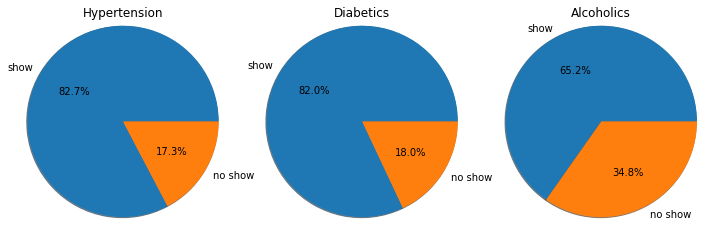

In [130]:
#plots

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (10,8))
ax1.pie(hyp_sizes, labels = hyp_labels, autopct ='%1.1f%%',
    shadow = True, radius = 3)
ax1.set_title('Hypertension',pad=65)

ax2.pie(diab_sizes,labels=diab_labels,autopct='%1.1f%%',
       shadow=True,radius=3)
ax2.set_title('Diabetics',pad=65)

ax3.pie(alc_sizes,labels=alc_labels,autopct='%1.1f%%',
       shadow=True,radius=3)
ax3.set_title('Alcoholics',pad=65)

fig1.subplots_adjust(wspace=2)

plt.show()

### Conclusions

The dataset contains variables that belong mostly to the norminal level of measurement hence the heavy reliance on grouping and bar chat plots. In the plots, it was obvious that the differences between variables are mostly small. However, a combination of variables, especially those with a bit higher percentage points might show relationships that might likely be considered, with additional analysis, as predictors of a patient showing up. The dataset is short of quantitative variables, so adequately representing statistical correlation was not possible. The analysis relied heavily on categorization and proportion.

#### Analysis Questions and answers

#####  - Can age be an indicator of wether a patient shows up for a medical appointment?

From the dataset, the show up proportion percentage of individuals with age 64 and above (labeled 'seniors') is higher than the rest (84.5%). The lowest proportion percentage are patients within ages 15 and 24 (labeled 'youths'). In between lies 'adults' (80.26%) and 'children' (78.82%). The middle group is relatively close. However, this is not surprising due to the fact that must children aged 14 and below are dependent on adults aged 25 to 64. Using the knowledege that the human body increasingly becomes week with age, it is not surprising that the seniors have higher percentage of show ups. On the other end, patients described as youth are new adults and tend to be a bit more reckless, and might skip more appointements. Given this evidence from the data, there might likely be a correlation between the patients age and the possibility of showing up for the medical appointments.

##### - Can the gender of a patient be a determinant of the likelihood of a patient showing up for a medical appointment?

Analysis of the dataset reveals that the gender of patients recorded cannot be reliably correlated to tendency to show up fo the appointments. The percent proportion of female patients is 79.6 while that of the male patients is 80.03

##### - Does the appointment day of the week determine if a patient will show up?

Analysis of the dataset for this question posits that there is relatively equal percent ratio of showing up for all the seven days in a week. If this findings where to be correlated with the posibility of showing up, there is might be equal chance of patients showing up or not at any day of the week. Although, it was observed from the dataset that saturdays have the lowest show up rate. Emphasis was not not placed on it due to the fact that on 39 observations were recorded on the day in total, which is small compared with the thousands in others.

##### - Does SMS reminders influence showing up?

By far the most interesting findings of this analysis. The percent proportion of those that recieved SMS reminders and showed up is less than those that did not recieved and showed. Conventional logic might dictate that if a reminder is sent, the individual might more likely show up because abstentations have been most often ascribed to forgetfulness. But reverse is the case in the context. In correlation to showing up, reminder is negatively related. Although, these cannot be considered as a validation that not sending SMS can likely increase show up rate.

##### -Does the length of time between booking and actual appointment time affect showing up?

In the analysis for this question, the dataset set seem to suggest that appointments schedule for a day or less have the greater proportion of been fulfilled. The percent proportion of a day or less is significatly higher and can be correlated with the likelihood of showing up.

#### Limitations

The analysis was done based purely on the categorical variables that are dominant in the dataset. Analysis of categorical values have low reliability because of the limited analytical techniques that could be applied to them. Hence, the dominant method adopted for the study is the percent proportion analysis. This technique suffers from a range of issues, one of which is it doesnt fully capture the total number of individual observations that make up a particular group. For example, a group with a fewer set of values can give the illusion of a very high or very low percentage compared to other groups with higher total values. Also, the dataset was missing a number of key variables that could have likely increased the reliability of the analysis result. Variables like distance from the patient to the hospital, educational background of the patient, economic status of the neighborhood, etc. are other key variables that could have shed more light on the factors that could determine keeping up with medical appointments by patients

#### Conclusion

To answer the analysis question, a host of variables need to be considered as likely factors to predict a patient showing up for appointments. Most of the variables analysed were found to not be of significant proportion as to warrant a reliable conclusion. These and the absence of quantitative variables for real correlation analysis further affects the dependability of the results. However, from the analysis of the dataset, it is believed that considering multiple variables together could be potential indicators. The stand out variables with noticeable percent proportion are age and duration of time between contact and appointment. Positing on this, and considering potentially more data analysis on causation, an individual with advance age and appointment set less than a day, has a greater probability of showing up. Age and duration can be deemed positively correlated to showing up.